In [1]:
import pandas as pd
import ast

In [2]:
# Load the character metadata
movie_metadata_columns = [
    "Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date",
    "Movie box office revenue", "Movie runtime", "Movie languages", "Movie countries", 
    "Movie genres"
]

movie_metadata = pd.read_csv('./MovieSummaries/movie.metadata.tsv', sep='\t', header=None, names=movie_metadata_columns, encoding='utf-8', error_bad_lines=False)

# Display the first few rows of the character metadata
movie_metadata.head()


C:\Users\arist\AppData\Local\Temp\ipykernel_30936\3003773314.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  movie_metadata = pd.read_csv('./MovieSummaries/movie.metadata.tsv', sep='\t', header=None, names=movie_metadata_columns, encoding='utf-8', error_bad_lines=False)


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [3]:
def parse_encoded_col(encoded_str):
    try:
        return ast.literal_eval(encoded_str)
    except (ValueError, SyntaxError):
        return {}

In [4]:
# Apply the parse_encoded_col function to relevant columns
movie_metadata['Movie languages'] = movie_metadata['Movie languages'].apply(parse_encoded_col)
movie_metadata['Movie countries'] = movie_metadata['Movie countries'].apply(parse_encoded_col)
movie_metadata['Movie genres'] = movie_metadata['Movie genres'].apply(parse_encoded_col)

# Extract values from the dictionaries (as lists)
movie_metadata['Languages'] = movie_metadata['Movie languages'].apply(lambda x: list(x.values()))
movie_metadata['Countries'] = movie_metadata['Movie countries'].apply(lambda x: list(x.values()))
movie_metadata['Genres'] = movie_metadata['Movie genres'].apply(lambda x: list(x.values()))

# Display the parsed columns
movie_metadata[['Movie name', 'Languages', 'Countries', 'Genres']].head()


,Movie name,Languages,Countries,Genres
0,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,Getting Away with Murder: The JonBenét Ramsey ...,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,Brun bitter,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,White Of The Eye,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,A Woman in Flames,[German Language],[Germany],[Drama]


# Step 1: Data Preparation


In [5]:

# Create a new DataFrame to work on to avoid altering the original DataFrame
metadata_prepared = movie_metadata.copy()

# Aggregate data for genres
# We'll create a function to calculate the average budget and box office revenue for each genre
def calculate_averages(genre_list, metadata):
    averages = {}
    for genre in genre_list:
        genre_movies = metadata[metadata['Genres'].apply(lambda x: genre in x)]
        average_budget = genre_movies['Movie box office revenue'].dropna().mean()
        average_box_office = genre_movies['Movie box office revenue'].dropna().mean()
        averages[genre] = {'average_budget': average_budget, 'average_box_office': average_box_office}
    return averages

# Get the unique genres from the dataset
all_genres = set(genre for sublist in metadata_prepared['Genres'] for genre in sublist)

# Calculate the averages for each genre
genre_averages = calculate_averages(all_genres, metadata_prepared)

In [6]:

# One-hot Encoding
# We use the MultiLabelBinarizer from sklearn to transform the 'Genres' column into a one-hot encoded matrix
from sklearn.preprocessing import MultiLabelBinarizer


In [7]:

mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(metadata_prepared['Genres'])
genres_encoded_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

# Concatenate the one-hot encoded genres back to the original metadata
metadata_prepared = pd.concat([metadata_prepared, genres_encoded_df], axis=1)

# Step 2: Feature Engineering
# For now, we only create the vector space model with one-hot encoded genres
# We will integrate other metadata later in the analysis

metadata_prepared.head() # Display the first few rows of the prepared metadata

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Languages,...,Werewolf fiction,Western,Whodunit,Women in prison films,Workplace Comedy,World History,World cinema,Wuxia,Z movie,Zombie Film
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",[English Language],...,0,0,0,0,0,0,0,0,0,0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/02n4kr': 'Mystery', '/m/03bxz7': 'Biograp...",[English Language],...,0,0,0,0,0,0,0,0,0,0
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,{'/m/05f_3': 'Norwegian Language'},{'/m/05b4w': 'Norway'},"{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D...",[Norwegian Language],...,0,0,0,0,0,0,0,0,0,0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{'/m/01jfsb': 'Thriller', '/m/0glj9q': 'Erotic...",[English Language],...,0,0,0,0,0,0,0,0,0,0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,{'/m/04306rv': 'German Language'},{'/m/0345h': 'Germany'},{'/m/07s9rl0': 'Drama'},[German Language],...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Display the one-hot encoded genres and the aggregate data
genre_averages


{'Mystery': {'average_budget': 63361195.27859238,
  'average_box_office': 63361195.27859238},
 'Tragedy': {'average_budget': 141885352.10204083,
  'average_box_office': 141885352.10204083},
 'Black-and-white': {'average_budget': 5800800.317934782,
  'average_box_office': 5800800.317934782},
 'Political drama': {'average_budget': 30387471.43373494,
  'average_box_office': 30387471.43373494},
 'Crime Comedy': {'average_budget': 32828484.104651164,
  'average_box_office': 32828484.104651164},
 'Tokusatsu': {'average_budget': nan, 'average_box_office': nan},
 'Czechoslovak New Wave': {'average_budget': nan, 'average_box_office': nan},
 'Extreme Sports': {'average_budget': 58617573.333333336,
  'average_box_office': 58617573.333333336},
 'Space western': {'average_budget': 152546383.83333334,
  'average_box_office': 152546383.83333334},
 'Western': {'average_budget': 21436444.17777778,
  'average_box_office': 21436444.17777778},
 'Dogme 95': {'average_budget': 1297175.0, 'average_box_office

In [9]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:

# Step 3: Similarity Assessment

# 1. Correlation Analysis
# Calculate the Pearson correlation matrix for the one-hot encoded genre data
correlation_matrix = genres_encoded_df.corr()


In [11]:

# 2. Jaccard Similarity
# Define a function to calculate the Jaccard similarity between two sets
def jaccard_similarity(list1, list2):
    intersection = len(set(list1).intersection(list2))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

# Calculate the Jaccard similarity matrix
jaccard_similarity_matrix = np.zeros((len(mlb.classes_), len(mlb.classes_)))

for i, genre_i in enumerate(mlb.classes_):
    for j, genre_j in enumerate(mlb.classes_):
        if i >= j:  # Jaccard similarity is symmetric, no need to calculate twice
            continue
        # Calculate the Jaccard similarity and fill the matrix
        jaccard_similarity_matrix[i, j] = jaccard_similarity(
            genres_encoded_df[genre_i].to_list(),
            genres_encoded_df[genre_j].to_list()
        )
        jaccard_similarity_matrix[j, i] = jaccard_similarity_matrix[i, j]

# Transform the Jaccard similarity matrix into a DataFrame for better readability
jaccard_similarity_df = pd.DataFrame(jaccard_similarity_matrix, index=mlb.classes_, columns=mlb.classes_)


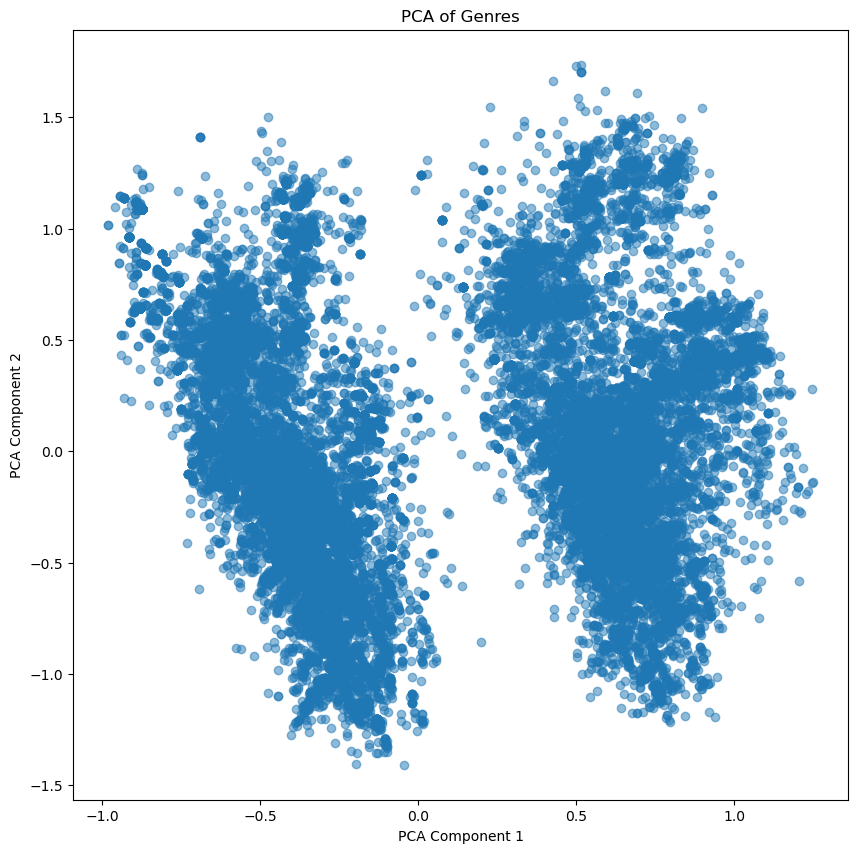

(                  Absurdism  Acid western    Action  Action Comedy  \
 Absurdism          1.000000     -0.000352  0.006002       0.014537   
 Acid western      -0.000352      1.000000  0.011404      -0.000478   
 Action             0.006002      0.011404  1.000000       0.124108   
 Action Comedy      0.014537     -0.000478  0.124108       1.000000   
 Action Thrillers  -0.002675     -0.000836  0.214048       0.009975   
 
                   Action Thrillers  Action/Adventure  Addiction Drama  \
 Absurdism                -0.002675          0.009326        -0.000917   
 Acid western             -0.000836          0.033007        -0.000287   
 Action                    0.214048          0.482758        -0.005154   
 Action Comedy             0.009975          0.142650        -0.001244   
 Action Thrillers          1.000000          0.251153        -0.002178   
 
                      Adult  Adventure  Adventure Comedy  ...  \
 Absurdism        -0.001756   0.003688          0.024692  ...

In [12]:

# 3. Principal Component Analysis (PCA)
# Perform PCA to reduce the genres to 2 dimensions for visualization
pca = PCA(n_components=2)
genres_pca = pca.fit_transform(genres_encoded_df)

# Plot the PCA results
plt.figure(figsize=(10, 10))
plt.scatter(genres_pca[:, 0], genres_pca[:, 1], alpha=0.5)
plt.title('PCA of Genres')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Return the first few rows of the correlation matrix for inspection
correlation_matrix.head(), jaccard_similarity_df.head()


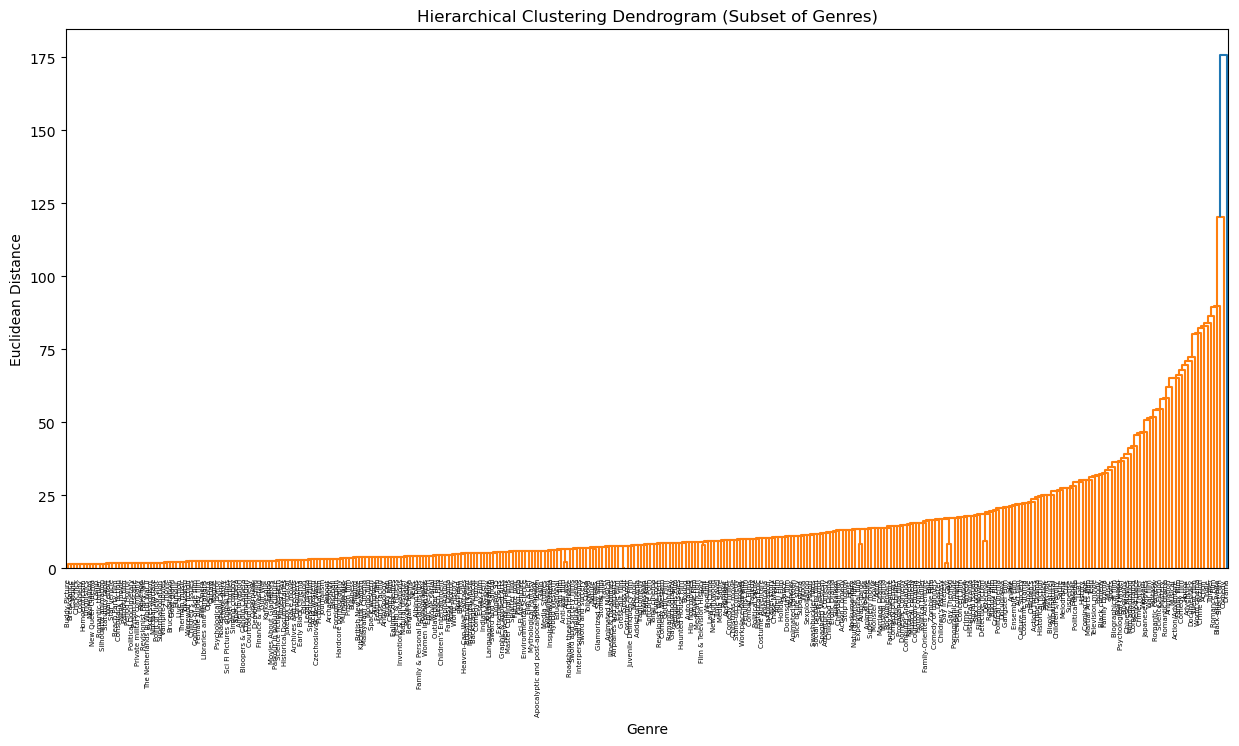

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform Hierarchical Clustering
linked = linkage(genres_encoded_df.T, 'single')  # Transpose to cluster genres, not movies

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked, labels=genres_encoded_df.columns, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Subset of Genres)')
plt.xlabel('Genre')
plt.ylabel('Euclidean Distance')
plt.show()


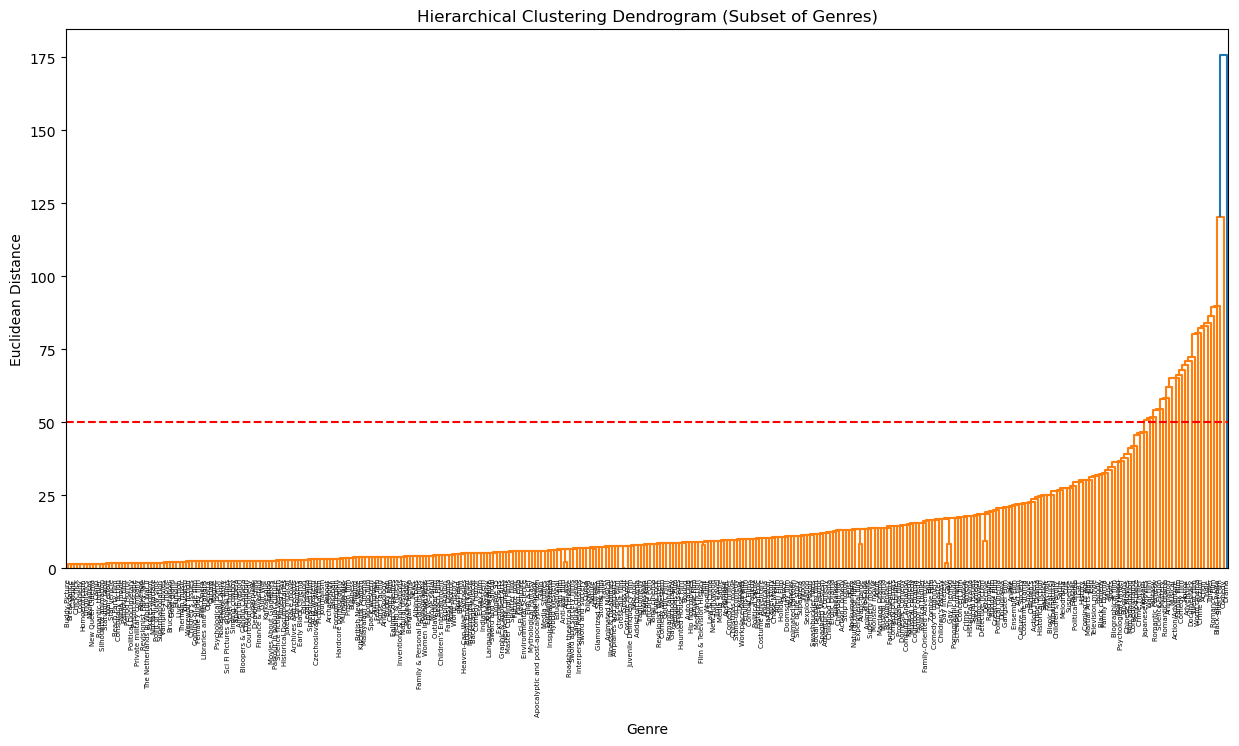

In [18]:
# To choose a reasonable threshold, we can look at the dendrogram and pick a distance level
# that seems to separate the genres into distinct clusters without being too granular.

# Examining the dendrogram visually, we might pick a threshold where we can see clear separation.
# For demonstration, let's choose a threshold of 0.3 (This is an arbitrary choice for illustrative purposes).
# This is something that would ideally be chosen in consultation with domain experts.

threshold = 50

# Plot the dendrogram with the chosen threshold
plt.figure(figsize=(15, 7))
dendrogram(linked, labels=genres_encoded_df.columns, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Subset of Genres)')
plt.xlabel('Genre')
plt.ylabel('Euclidean Distance')
plt.axhline(y=threshold, color='r', linestyle='--')
plt.show()


In [19]:
from scipy.cluster.hierarchy import fcluster

# Determine the clusters at the given threshold
clusters = fcluster(linked, threshold, criterion='distance')

# Map each genre to its cluster
cluster_map = {genre: cluster for genre, cluster in zip(genres_encoded_df.columns, clusters)}

# Group genres by cluster
clustered_genres = {}
for genre, cluster in cluster_map.items():
    clustered_genres.setdefault(cluster, []).append(genre)

# Output the clusters
clustered_genres


{1: ['Absurdism',
  'Acid western',
  'Action Comedy',
  'Action Thrillers',
  'Addiction Drama',
  'Adult',
  'Adventure Comedy',
  'Airplanes and airports',
  'Albino bias',
  'Alien Film',
  'Alien invasion',
  'Americana',
  'Animal Picture',
  'Animals',
  'Animated Musical',
  'Animated cartoon',
  'Anime',
  'Anthology',
  'Anthropology',
  'Anti-war',
  'Anti-war film',
  'Apocalyptic and post-apocalyptic fiction',
  'Archaeology',
  'Archives and records',
  'Art film',
  'Auto racing',
  'Avant-garde',
  'B-Western',
  'B-movie',
  'Backstage Musical',
  'Baseball',
  'Beach Film',
  'Beach Party film',
  'Bengali Cinema',
  'Biker Film',
  'Biographical film',
  'Biography',
  'Biopic [feature]',
  'Black comedy',
  'Blaxploitation',
  'Bloopers & Candid Camera',
  'Bollywood',
  'Boxing',
  'Breakdance',
  'British Empire Film',
  'British New Wave',
  'Bruceploitation',
  'Buddy Picture',
  'Buddy cop',
  'Buddy film',
  'Business',
  'C-Movie',
  'Camp',
  'Caper story',
